# Prediction using Unsupervised Maching Learning 

In [5]:
#Including libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris 


In [6]:
#reading data from link
iris=load_iris()


In [8]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
data=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# #using elbow method to find no. of cluster for kmeans

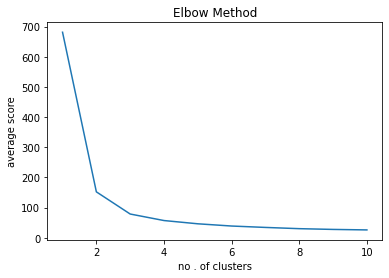

In [9]:
sse=[]
for n in range(1,11):
    kmean=KMeans(n_clusters=n)
    kmean.fit(iris['data'])
    sse.append(kmean.inertia_)
#Now plotiing the results on the line graph
from matplotlib import pyplot as plt
plt.plot(range(1,11),sse)
plt.title('Elbow Method')
plt.xlabel('no . of clusters')
plt.ylabel('average score')
plt.show()

In [28]:
#from the graph the elbow point is 3 and hence optimum no. of cluster is 3.

# #Applying K-mean clustering method

In [13]:
#we willcreate k-mean classifier
model=KMeans(n_clusters=3)
#fitting iris data
model.fit(iris['data'])

KMeans(n_clusters=3)

In [18]:
#prediction of datset
data.target=model.labels_
d1=data[data.target==0]
d2=data[data.target==1]
d3=data[data.target==2]

In [51]:
#centriods is
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# ploting graph for iris data

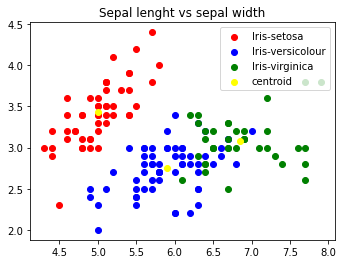

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(d1[['sepal length (cm)']],d1[['sepal width (cm)']], color = 'red', label = 'Iris-setosa')
plt.scatter(d2[['sepal length (cm)']], d2[['sepal width (cm)']], color = 'blue', label = 'Iris-versicolour')
plt.scatter(d3[['sepal length (cm)']], d3[['sepal width (cm)']], color = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, [0]], model.cluster_centers_[:,[1]], color = 'yellow', label = 'centroid')
plt.title('Sepal lenght vs sepal width')
plt.legend()

